# Electrical Resistivity Arrays and their sensitivities

In [2]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.ert as ert
from pygimli.physics import ert

In [3]:
scheme = ert.DataContainer()
x = np.arange(10.)
for xi in x:
    scheme.createSensor([xi, 0])

scheme

Data: Sensors: 10 data: 0, nonzero entries: ['a', 'b', 'm', 'n']

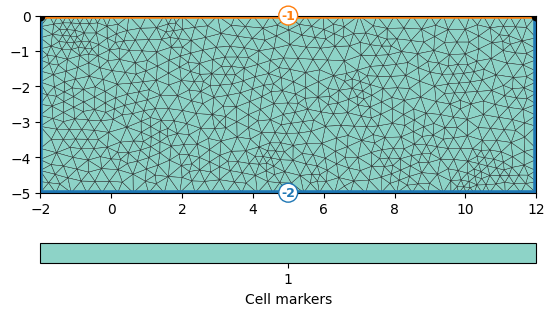

In [4]:
world = mt.createWorld(start=[-2, 0], end=[12, -5], worldMarker=True, marker=1)
for pos in scheme.sensorPositions():
    world.createNode(pos)

mesh = mt.createMesh(world, area=.1, quality=34, smooth=[1, 10])
pg.show(mesh, markers=True, showMesh=True);

In [5]:
def plotABMN(ax, scheme, idx):
    """ Visualize four-point configuration on given axes. """
    def getABMN(scheme, idx):
        """ Get coordinates of four-point cfg with id `idx` from DataContainerERT
        `scheme`."""
        coords = {}
        for elec in "abmn":
            elec_id = int(scheme(elec)[idx])
            if elec_id >= 0:
                elec_pos = scheme.sensorPosition(elec_id)
                coords[elec] = elec_pos.x(), elec_pos.y()
        return coords

    coords = getABMN(scheme, idx)
    for elec in coords:
        x, y = coords[elec]
        if elec in "ab":
            color = "green"
        else:
            color = "magenta"
        ax.plot(x, y, marker=".", color=color, ms=10)
        ax.annotate(elec.upper(), xy=(x, y), size=12, ha="center", #fontsize=10,
                    bbox=dict(boxstyle="round", fc=(0.8, 0.8, 0.8), ec=color),
                    xytext=(0, 20), textcoords='offset points',
                    arrowprops=dict(arrowstyle="wedge, tail_width=.5", fc=color, ec=color,
                                    patchA=None, alpha=0.75))
        ax.plot(coords["a"][0],)


def showSensitivity(shm, mesh, idx=None):
    fop = ert.ERTModelling()
    fop.setData(shm)
    fop.setMesh(mesh)
    model = np.ones(mesh.cellCount())
    fop.createJacobian(model)
    idx = idx or range(shm.size())
    for i in idx:
        sens = fop.jacobian()[i]
        normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 1e-2)
        normsens /= np.max(normsens)
        ax, _ = pg.show(mesh, normsens, cMap="bwr", colorBar=False,# ax=ax,
                        label="sensitivity", nLevs=3, cMin=-1, cMax=1)
        plotABMN(ax, shm, i);
        ax.set_xlim(-2, 12)
        ax.set_ylim(-5, 1)

## Clasificación de los arrays

Generalmente, se distinguen tres tipos de arrays según su ordenamiento:

* $\alpha$ arrays: C1-P1-P2-C2 los más comunes (soportan alto voltaje)
* $\beta$ arrays: C1-C2-P1-P2 bajo voltaje, pero alta resolución
* $\gamma$ arrays: C1-P1-C2-P2 poco comunes

### Array de Wenner ($\alpha$)

`C1--na--P1--na--P2--na--C2` sea la distancia $a$ incrementada con un factor $n$

In [59]:
we = ert.DataContainer(scheme)
we.addFourPointData(0, 3, 1, 2)
we.addFourPointData(1, 4, 2, 3)
we.addFourPointData(2, 5, 3, 4)
we.addFourPointData(3, 6, 4, 5)
we.addFourPointData(2, 8, 4, 6)
we.addFourPointData(0, 9, 3, 6)
we

Data: Sensors: 10 data: 6, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

06/06/23 - 09:31:57 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:31:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:31:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:31:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2886 Cells: 5572 Boundaries: 4278


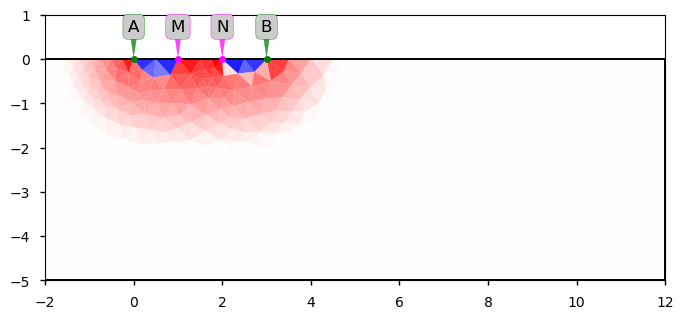

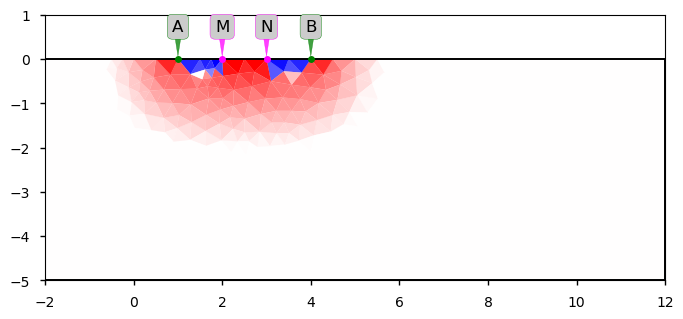

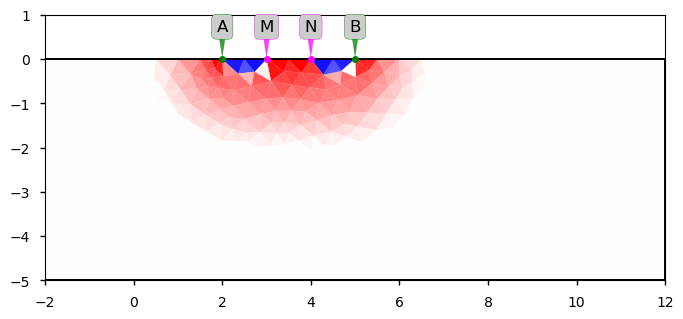

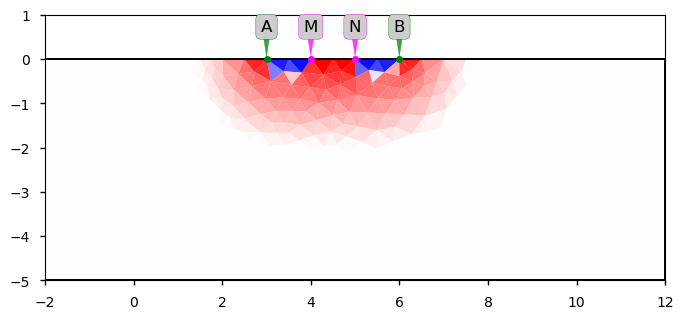

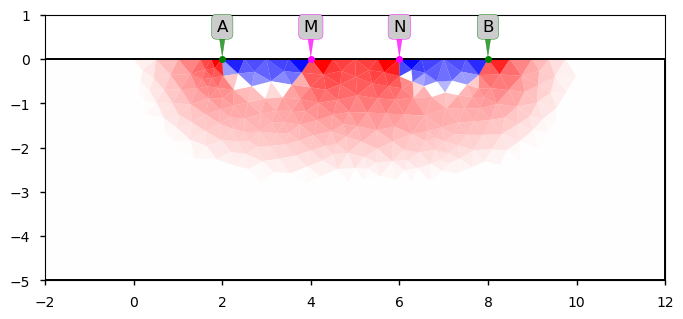

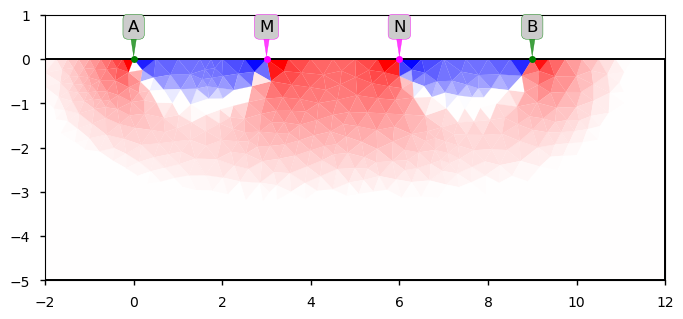

In [60]:
showSensitivity(we, mesh)

Data: Sensors: 10 data: 12, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

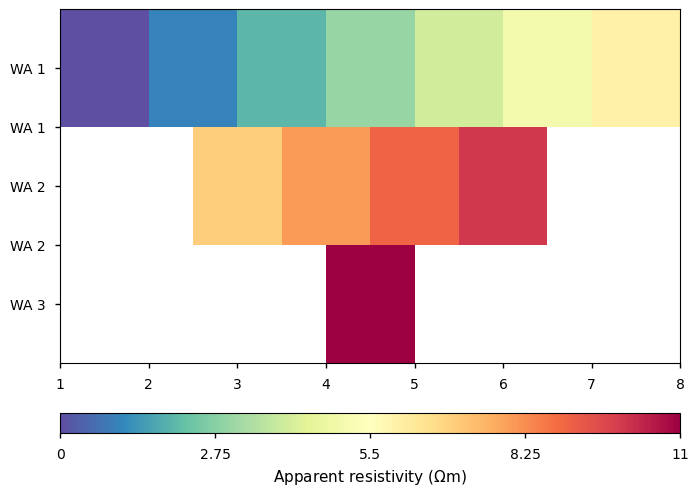

In [61]:
we = ert.createData(x, "wa")
ert.show(we, np.arange(we.size()))#ert.geometricFactor(we));
we

## Schlumberger array

`C1--na--P1-a-P2--na--C2` with the unit distance  $a$ and an increasing separation factor $n$

06/06/23 - 09:31:58 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:31:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:31:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:31:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2886 Cells: 5572 Boundaries: 4278


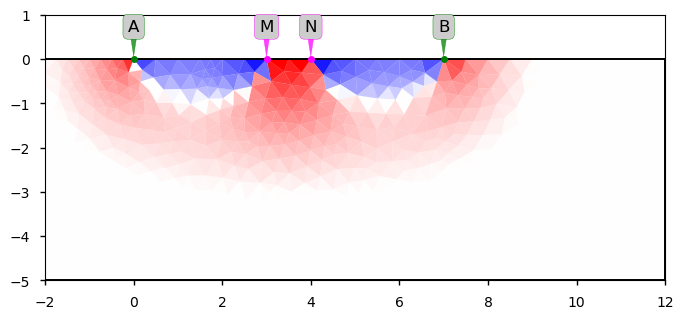

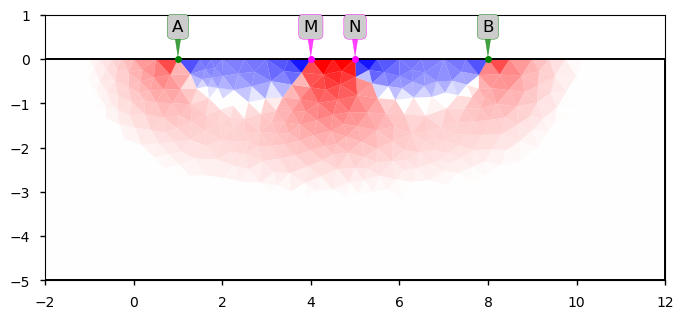

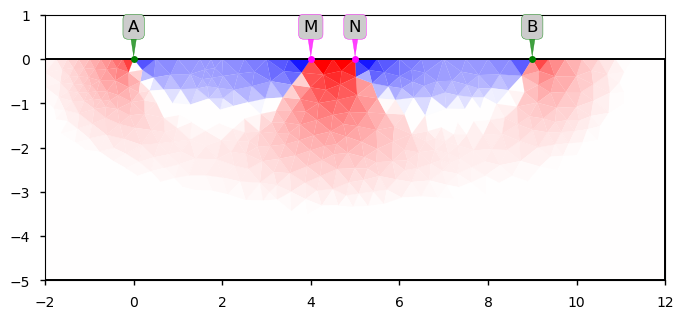

In [62]:
sl = ert.DataContainer(scheme)
# sl.addFourPointData(0, 3, 1, 2)  # already seen in Wenner
# sl.addFourPointData(1, 4, 2, 3)
# sl.addFourPointData(2, 5, 3, 4)
# sl.addFourPointData(3, 6, 4, 5)
sl.addFourPointData(0, 7, 3, 4)
sl.addFourPointData(1, 8, 4, 5)
sl.addFourPointData(0, 9, 4, 5)
showSensitivity(sl, mesh)

Data: Sensors: 10 data: 16, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

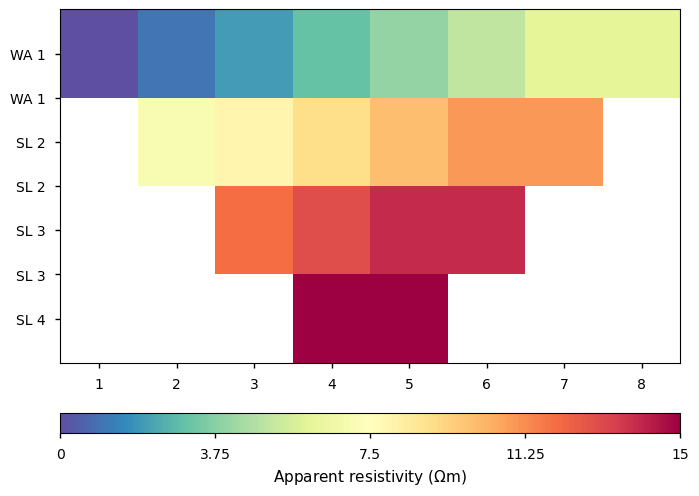

In [63]:
sl = ert.createData(x, "slm")
ert.show(sl, np.arange(sl.size()));#ert.geometricFactor(sl));
sl

## Dipole-Dipole array

`C1-a-C2--na--P1-a-P2` with the unit distance  $a$ and an increasing separation factor $n$

06/06/23 - 09:31:59 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:31:59 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:31:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:31:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2886 Cells: 5572 Boundaries: 4278


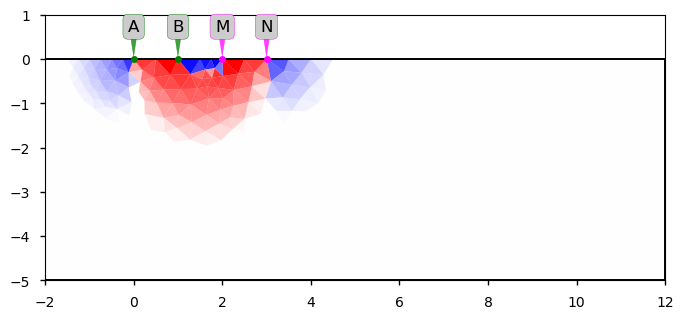

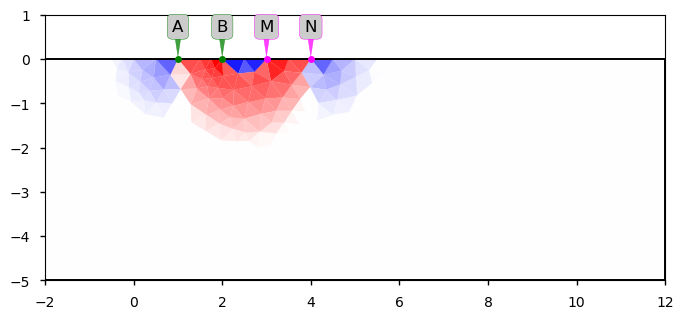

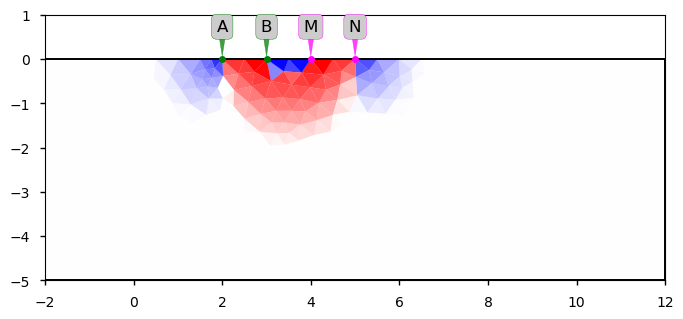

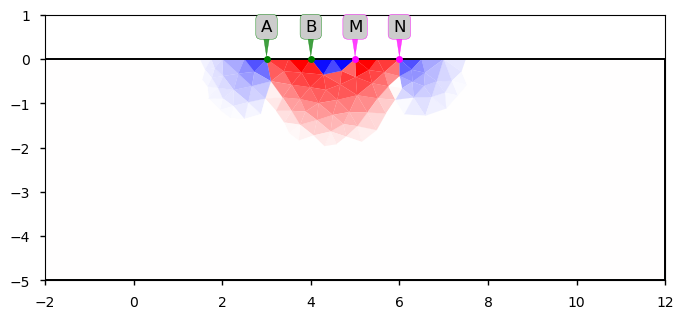

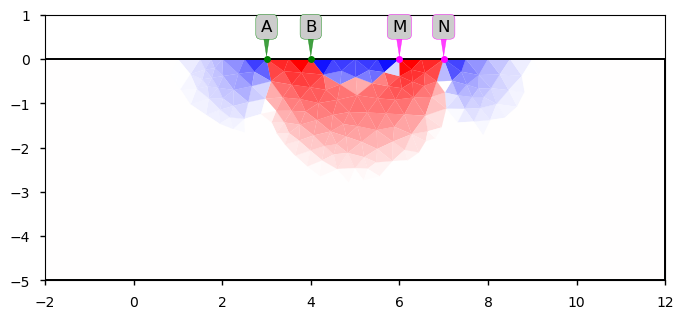

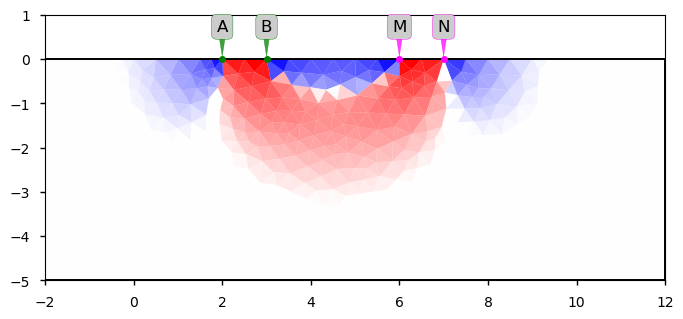

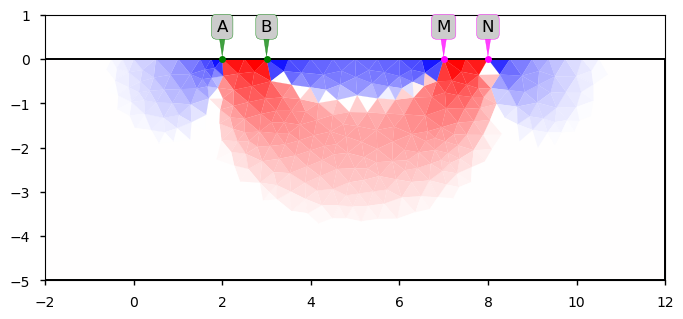

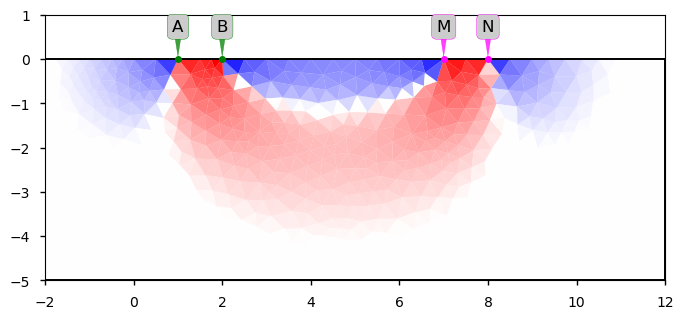

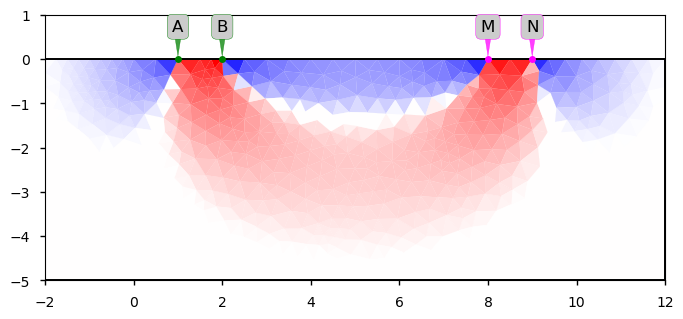

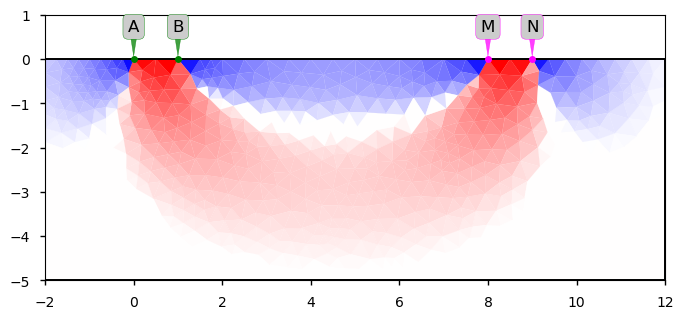

In [64]:
dd = ert.DataContainer(scheme)
dd.addFourPointData(0, 1, 2, 3)
dd.addFourPointData(1, 2, 3, 4)
dd.addFourPointData(2, 3, 4, 5)
dd.addFourPointData(3, 4, 5, 6)
dd.addFourPointData(3, 4, 6, 7)  # increasing dipole length
dd.addFourPointData(2, 3, 6, 7)
dd.addFourPointData(2, 3, 7, 8)
dd.addFourPointData(1, 2, 7, 8)
dd.addFourPointData(1, 2, 8, 9)
dd.addFourPointData(0, 1, 8, 9)
showSensitivity(dd, mesh)

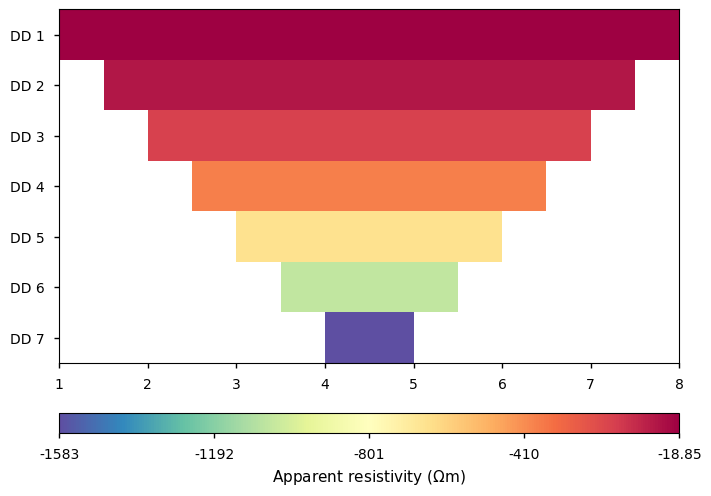

In [65]:
dd = ert.createData(x, "dd")
ert.show(dd, ert.geometricFactor(dd));

## Wenner ($\beta$) array

`C1--na--C2--na--P1--na--P2` with the unit distance $a$ and an increasing separation factor $n$

Data: Sensors: 10 data: 12, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

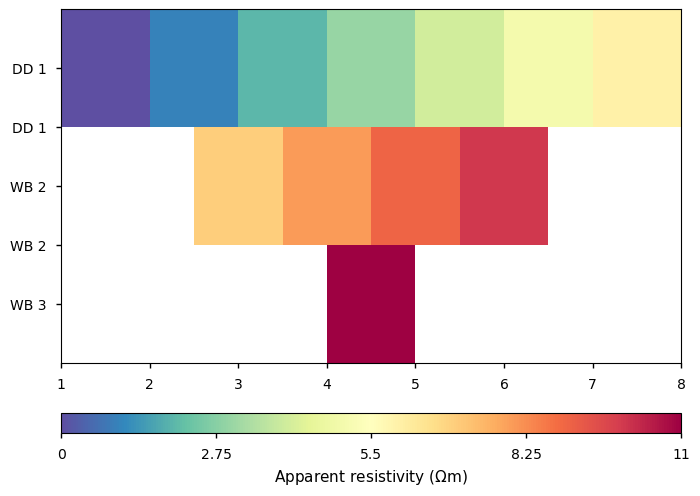

In [66]:
wb = ert.createData(x, "wb")
ert.show(wb, np.arange(wb.size()))# ert.geometricFactor(we));
wb

06/06/23 - 09:32:02 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:32:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:32:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:32:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2886 Cells: 5572 Boundaries: 4278


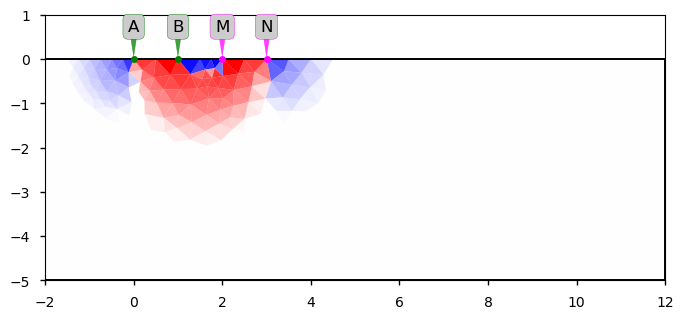

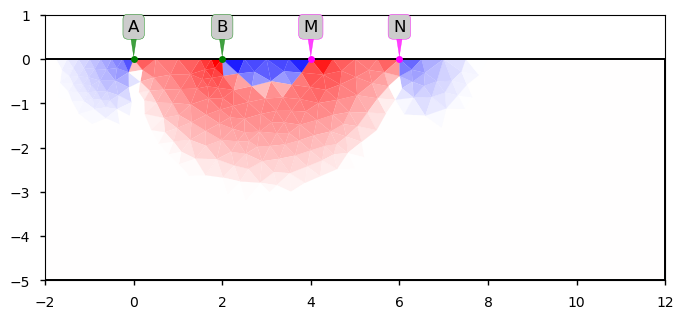

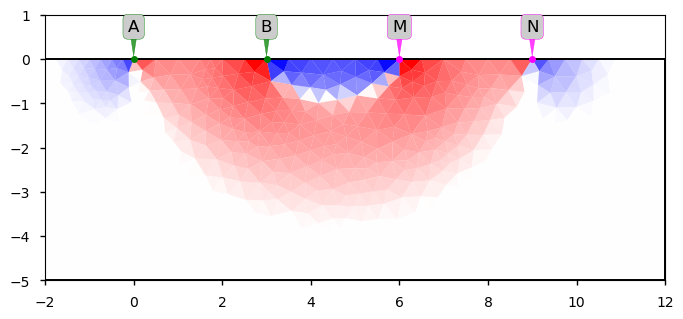

In [67]:
showSensitivity(wb, mesh, idx=[0, 7, 11])

## Multi-gradient array

Data: Sensors: 11 data: 14, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

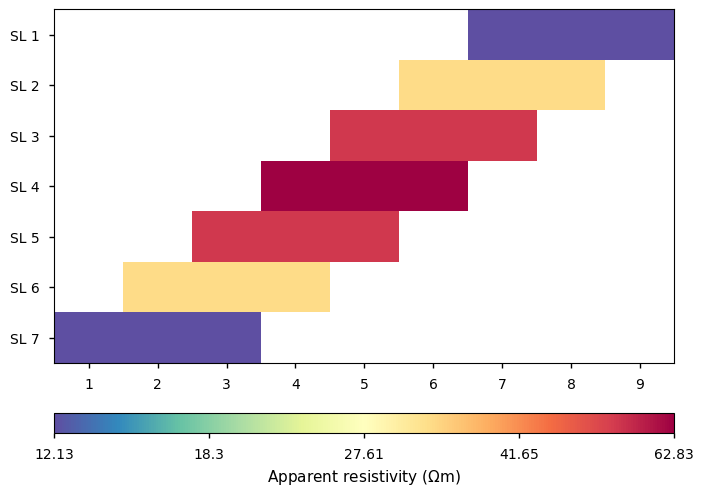

In [68]:
gr = ert.createData(11, "gr")
ert.show(gr, ert.geometricFactor(gr));
gr

06/06/23 - 09:32:03 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:32:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:32:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:32:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2886 Cells: 5572 Boundaries: 4278


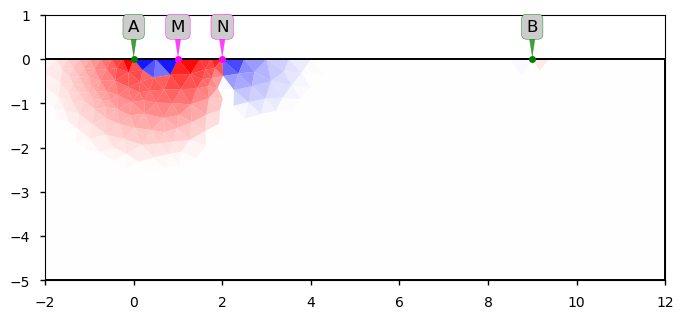

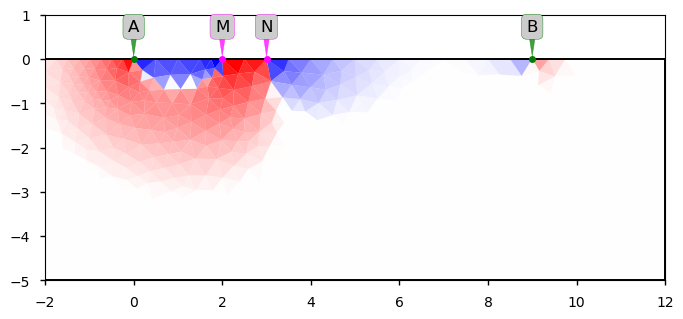

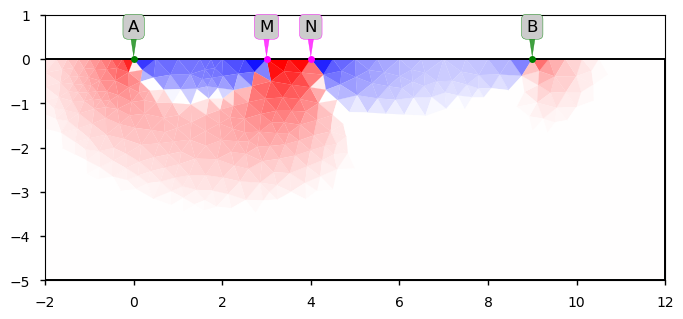

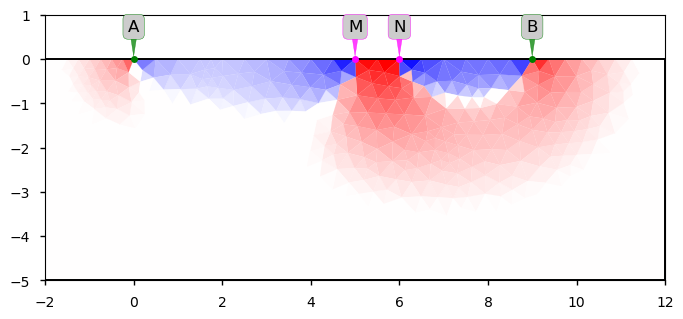

In [69]:
showSensitivity(gr, mesh, idx=[0, 1, 2, 4])

## Pole-Dipole array

`C1--na--P1-a-P2` with the unit distance $a$ and an increasing separation factor $n$

Data: Sensors: 10 data: 36, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

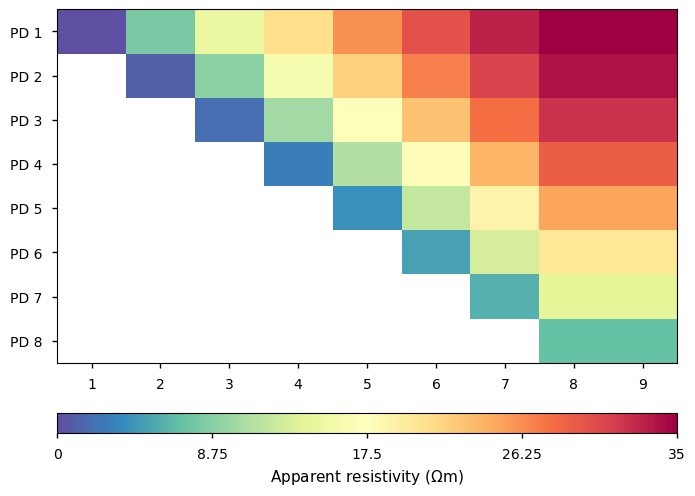

In [70]:
pd = ert.createData(x, "pd")
ert.show(pd, np.arange(pd.size()))# ert.geometricFactor(we));
pd

06/06/23 - 09:32:04 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:32:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:32:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:32:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2886 Cells: 5572 Boundaries: 4278


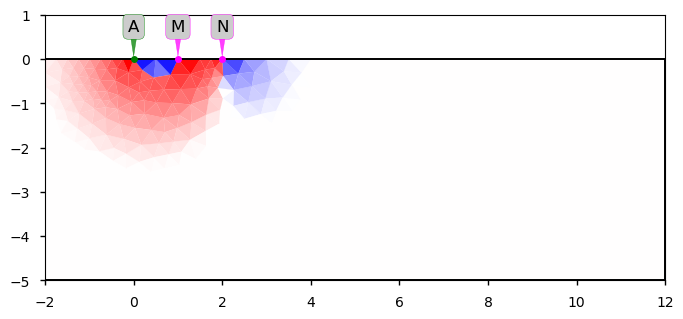

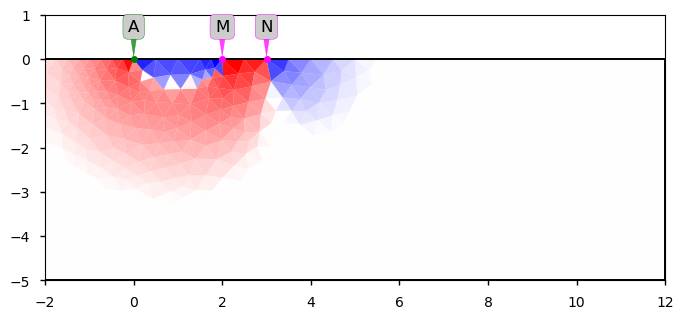

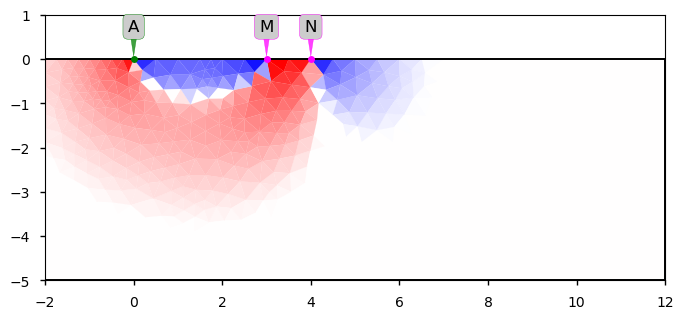

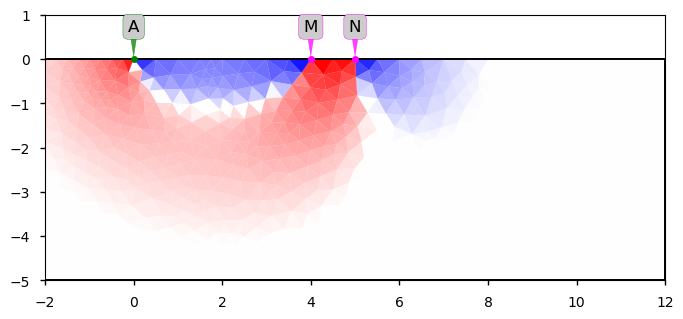

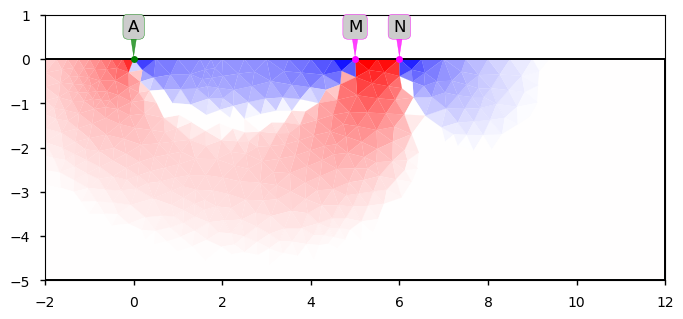

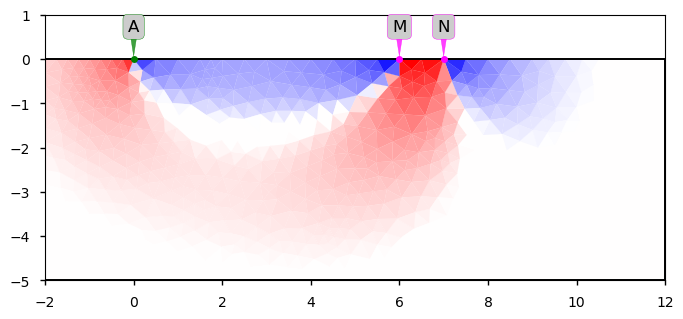

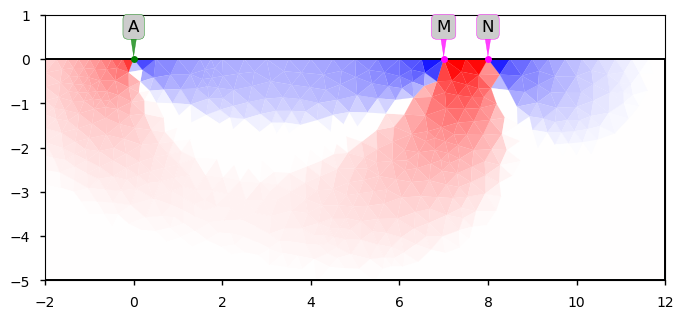

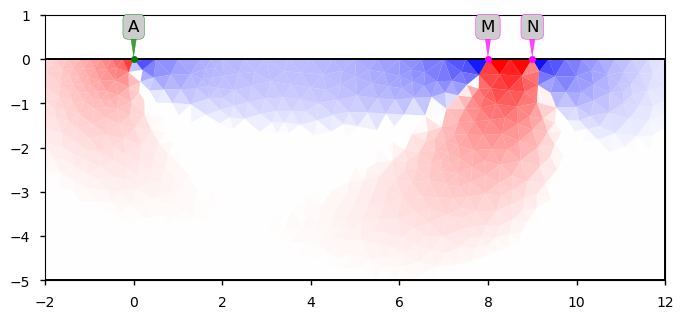

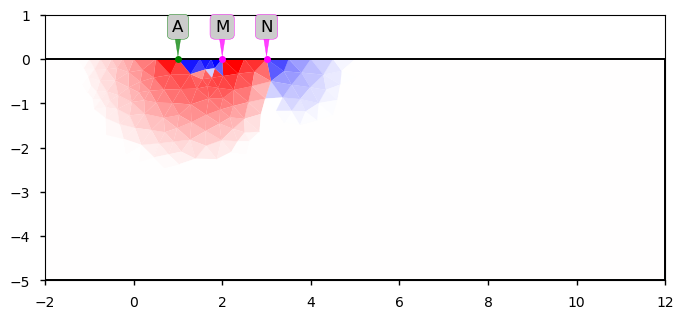

In [71]:
showSensitivity(pd, mesh, [0, 1, 2, 3, 4, 5, 6, 7, 8])

## Pole-Pole array

`C1--na--P1` with the unit distance $a$ and an increasing separation factor $n$

Data: Sensors: 10 data: 45, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

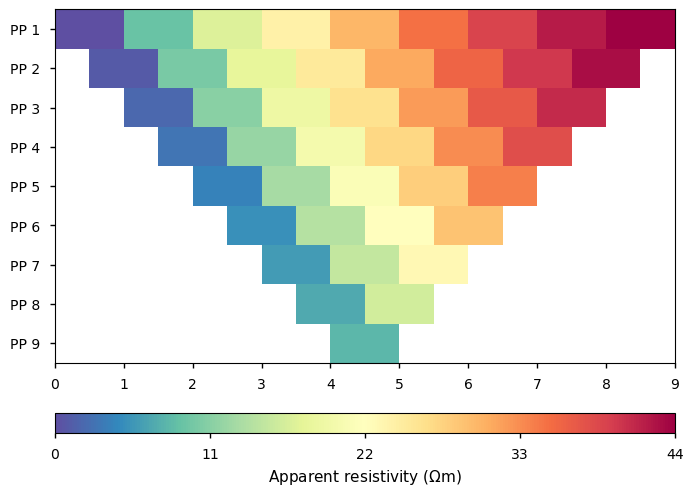

In [72]:
pp = ert.createData(x, "pp")
ert.show(pp, np.arange(pp.size()))# ert.geometricFactor(pp));
pp

06/06/23 - 09:32:06 - pyGIMLi - INFO - Found 1 regions.
06/06/23 - 09:32:06 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:32:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:32:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2886 Cells: 5572 Boundaries: 4278


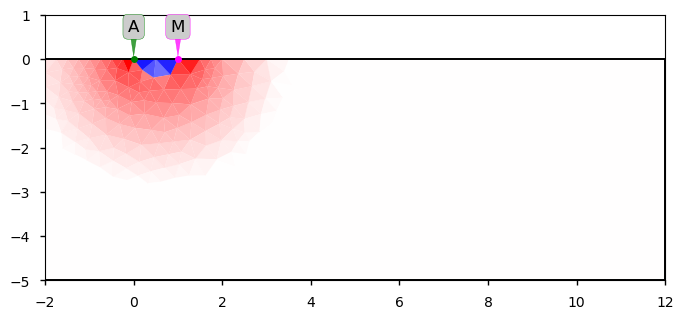

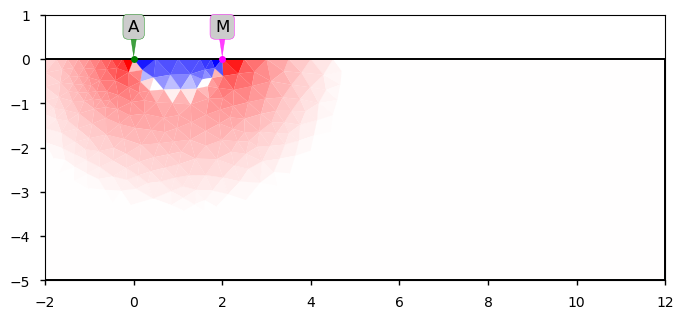

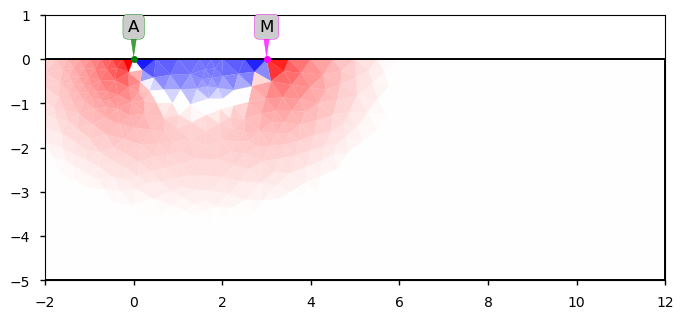

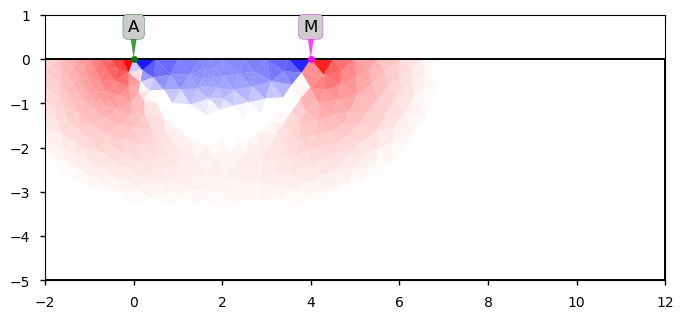

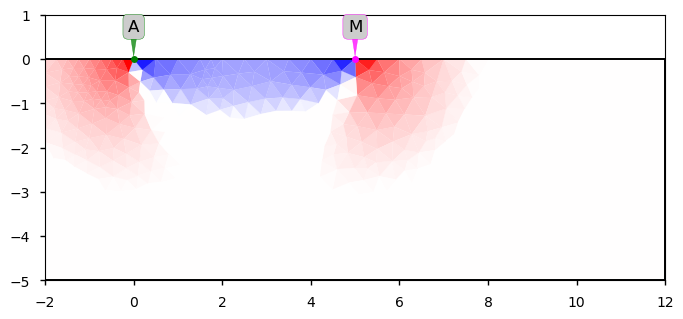

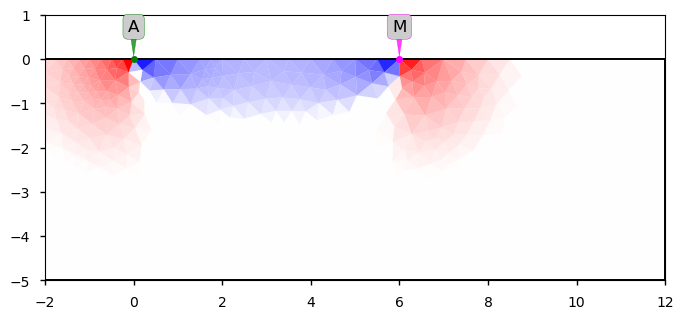

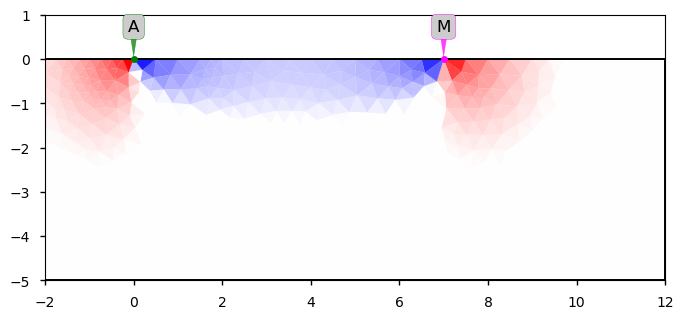

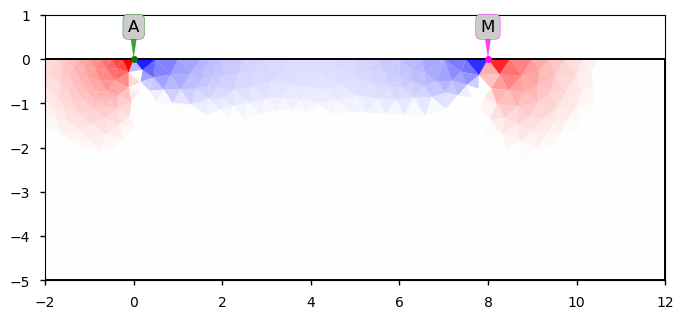

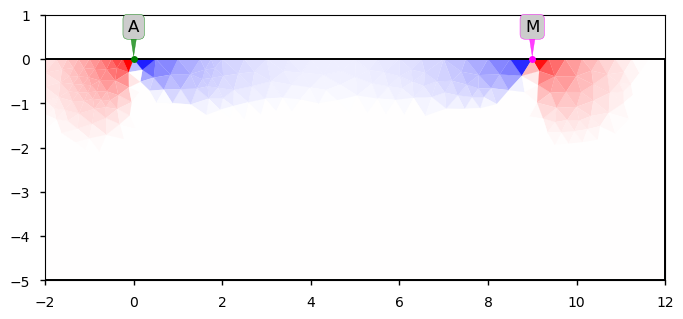

In [73]:
showSensitivity(pp, mesh, [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Modelling

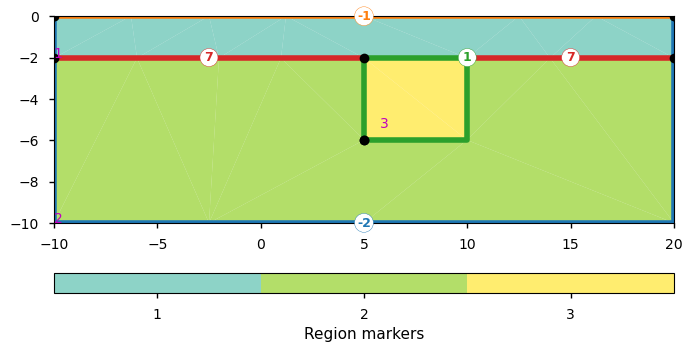

In [74]:
world = mt.createWorld(start=[-10, -10], end=[20, 0], layers=[-2], worldMarker=True)
cube = mt.createRectangle(start=[5, -6], end=[10, -2], marker=3)
geo = world + cube
pg.show(geo, markers=True);

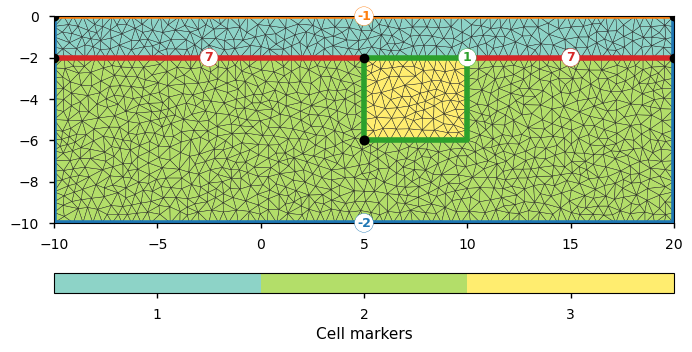

In [75]:
mesh = mt.createMesh(geo, area=0.2)
pg.show(mesh, markers=True, showMesh=True);

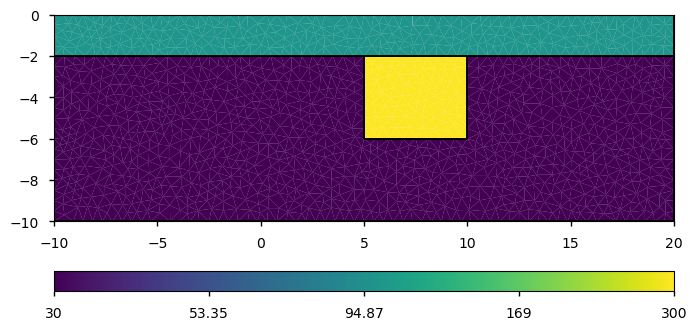

In [76]:
res = [[1, 100],  # sandy soil layer
       [2, 30],   # loam, till or clay layer
       [3, 300]]  # gravel lense
pg.show(mesh, res, logScale=True);

06/06/23 - 09:32:09 - pyGIMLi - INFO - Calculate geometric factors.
06/06/23 - 09:32:09 - pyGIMLi - INFO - Calculate geometric factors.
06/06/23 - 09:32:09 - pyGIMLi - INFO - Calculate geometric factors.


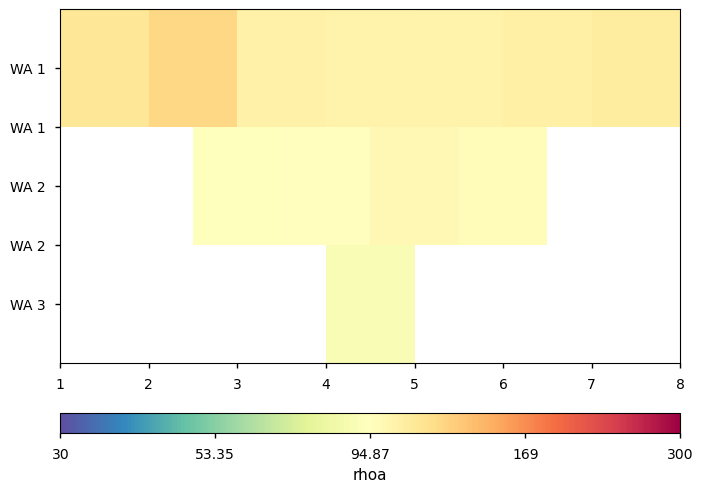

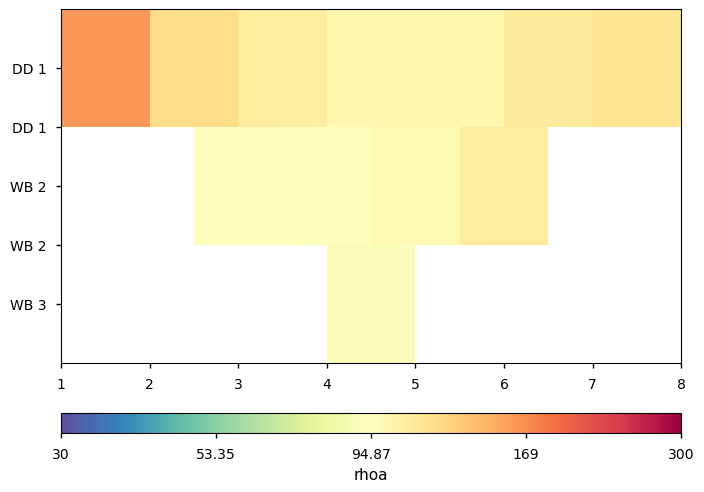

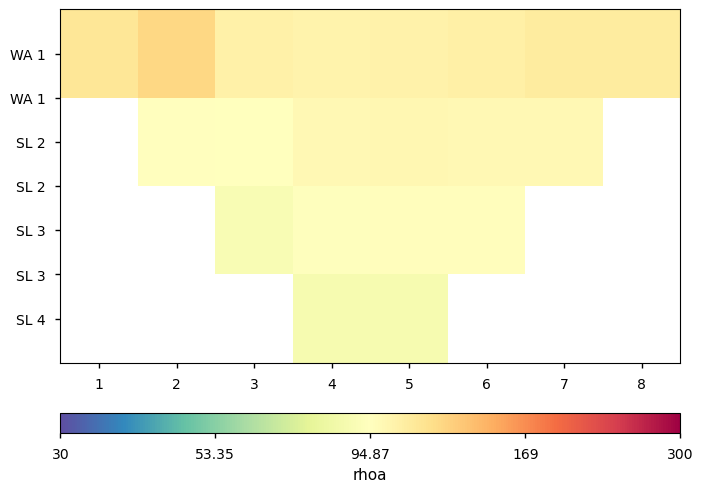

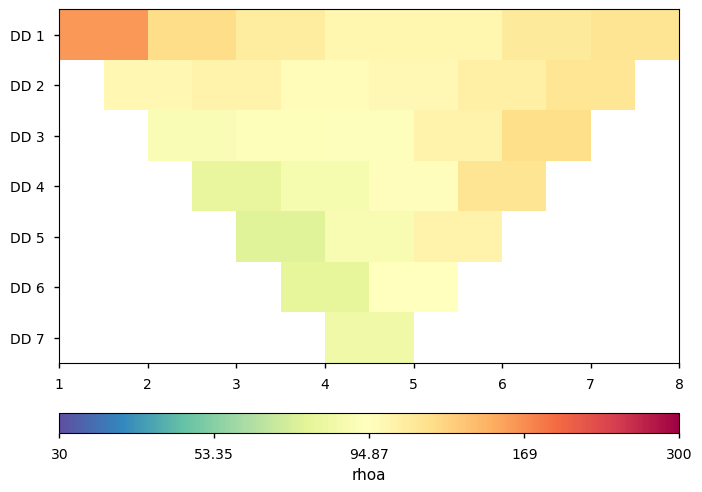

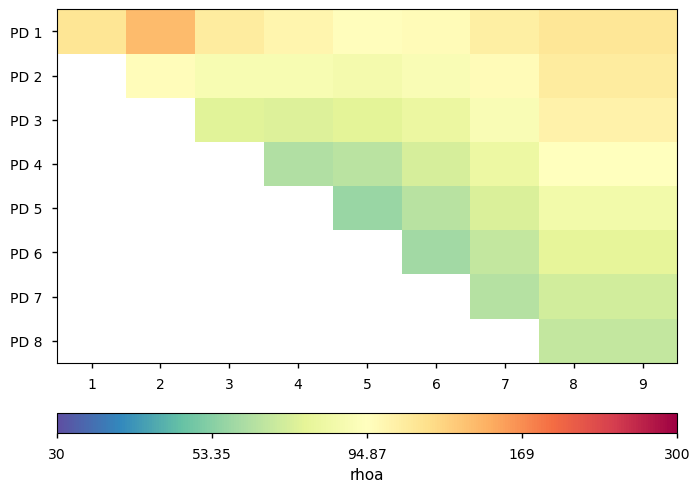

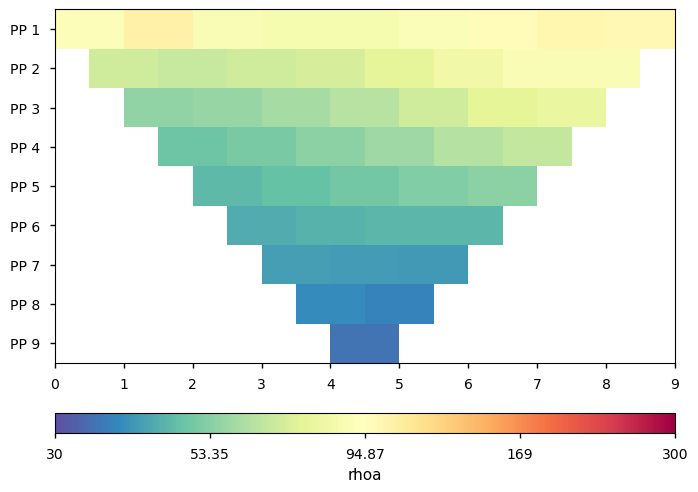

In [77]:
DATA = [we, wb, sl, dd, pd, pp]
for data in DATA:
    data["rhoa"] = ert.simulate(mesh, data, res, returnArray=True)
    ert.show(data, cMin=30, cMax=300);

In [78]:
data = DATA[0]
data["err"] = 0.03
mgr = ert.Manager(data)
mgr.invert()

06/06/23 - 09:32:10 - pyGIMLi - INFO - Found 2 regions.
06/06/23 - 09:32:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/06/23 - 09:32:10 - pyGIMLi - INFO - Found 2 regions.
06/06/23 - 09:32:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/06/23 - 09:32:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/06/23 - 09:32:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/06/23 - 09:32:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 651 Cells: 1200 Boundaries: 950
06/06/23 - 09:32:10 - pyGIMLi - INFO - Use median(data values)=103.94559167404381
06/06/23 - 09:32:10 - pyGIMLi - INFO - Created startmodel from forward operator: 134 [103.94559167404381,...,103.94559167404381]


134 [103.22226290582944,...,91.1153215410163]

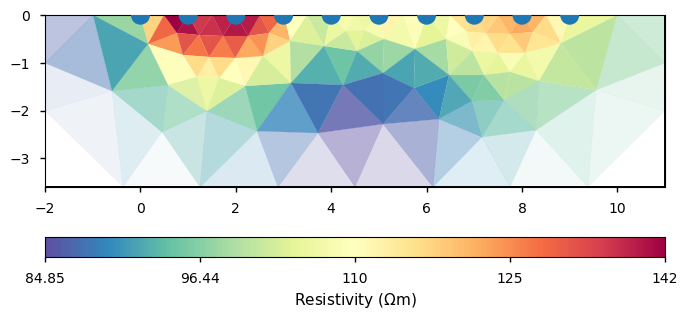

In [79]:
ax, cb = mgr.showResult()
#pg.viewer.showMesh(cube, marker=False, showBoundary=True, ax=ax, colorBar=None)

# Wrap-up

1. There is a variety of different arrays
1. Moving along a profile creates a mapping curve
1. Increasing distances (separations) lead to sounding (increased depth)
1. Data are summarized in a pseudo-section (which is not a subsection!)
1. Numerical data analysis necessary for imaging
1. Sensitivity distribution allows to see area of influence